In [ ]:
import yfinance as yf
# Get the data for tatamotors
ticker = "BERGEPAINT.NS"

# Download the data
data = yf.download(ticker, start="2021-05-23", end="2024-05-23")

[*********************100%%**********************]  1 of 1 completed


In [ ]:
data.columns

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [ ]:
market = data["Adj Close"]
returns = 100 * market.pct_change().dropna() # Volatility

In [ ]:
pip install arch


In [ ]:
from arch import arch_model

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data['Returns'] = data['Adj Close'].pct_change()

In [ ]:
returns = data['Returns'].dropna()

In [ ]:
returns = returns[np.isfinite(returns)]

In [ ]:
#Fit an ARCH model to the cleaned returns
model = arch_model(returns, vol='ARCH', p=1)
fitted_model = model.fit()

#Print the summary of the fitted model
print(fitted_model.summary())

Iteration:      1,   Func. Count:      5,   Neg. LLF: 855698261.4645153
Iteration:      2,   Func. Count:     16,   Neg. LLF: -1961.1042072638534
Iteration:      3,   Func. Count:     22,   Neg. LLF: -2052.032976508884
Iteration:      4,   Func. Count:     27,   Neg. LLF: 1203658.6181960264
Iteration:      5,   Func. Count:     34,   Neg. LLF: -2047.2473939021154
Iteration:      6,   Func. Count:     39,   Neg. LLF: -2059.9586585532543
Iteration:      7,   Func. Count:     43,   Neg. LLF: -2059.958685843122
Iteration:      8,   Func. Count:     46,   Neg. LLF: -2059.958685843019
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2059.958685843122
            Iterations: 8
            Function evaluations: 46
            Gradient evaluations: 8
                      Constant Mean - ARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-s

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002305. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


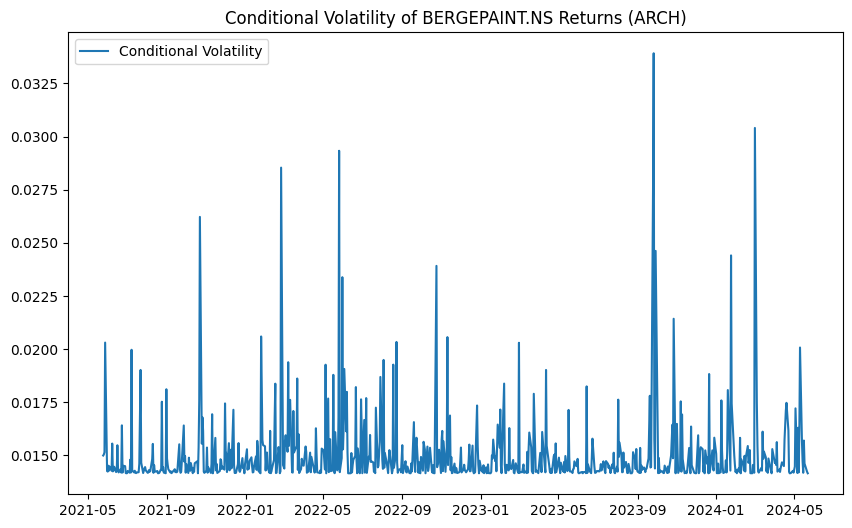

In [ ]:
#Plot the fitted model's conditional volatility
plt.figure(figsize=(10, 6))
plt.plot(fitted_model.conditional_volatility, label='Conditional Volatility')
plt.title(f'Conditional Volatility of {ticker} Returns (ARCH)')
plt.legend()
plt.show()

In [ ]:
# Fit a GARCH model to the cleaned returns
# 'vol' parameter is set to 'GARCH' to specify a GARCH model
# 'p' parameter specifies the lag order of the autoregressive component
# 'q' parameter specifies the lag order of the moving average component
model = arch_model(returns, vol='Garch', p=1, q=1)
fitted_model = model.fit()

# Print the summary of the fitted model
print(fitted_model.summary())

Iteration:      1,   Func. Count:      6,   Neg. LLF: 410116088.11444205
Iteration:      2,   Func. Count:     17,   Neg. LLF: -2065.515650024197
Optimization terminated successfully    (Exit mode 0)
            Current function value: -2065.5156502456584
            Iterations: 6
            Function evaluations: 17
            Gradient evaluations: 2
                     Constant Mean - GARCH Model Results                      
Dep. Variable:                Returns   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                2065.52
Distribution:                  Normal   AIC:                          -4123.03
Method:            Maximum Likelihood   BIC:                          -4104.60
                                        No. Observations:                  740
Date:                Wed, Jul 24 2024   Df Residuals:                      739
Time:        

/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002305. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


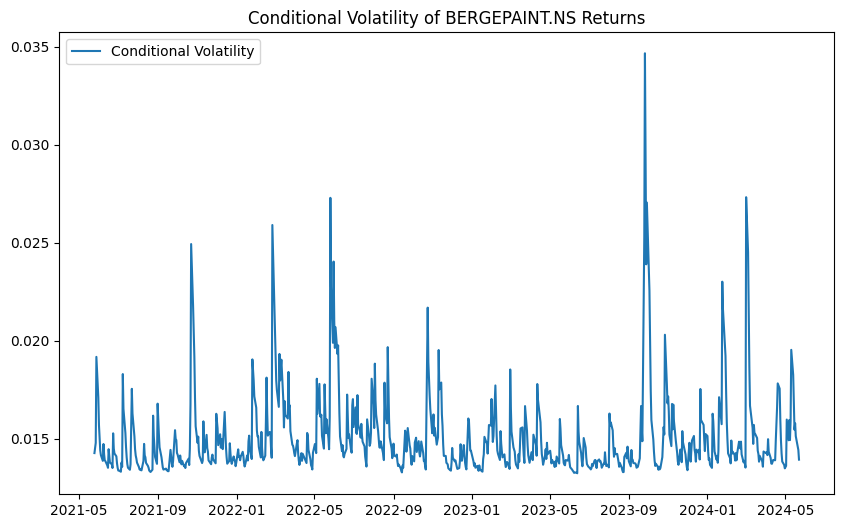

In [ ]:
#Plot the fitted model's conditional volatility
plt.figure(figsize=(10, 6))
plt.plot(fitted_model.conditional_volatility, label='Conditional Volatility')
plt.title(f'Conditional Volatility of {ticker} Returns')
plt.legend()
plt.show()

In [ ]:
am = arch_model(returns, vol="Garch", p=1, o=0, q=1, dist="Normal")
res = am.fit(update_freq=5)

Optimization terminated successfully    (Exit mode 0)
            Current function value: -2065.5156502456584
            Iterations: 6
            Function evaluations: 17
            Gradient evaluations: 2


/usr/local/lib/python3.10/dist-packages/arch/univariate/base.py:311: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0002305. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 100 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  warnings.warn(


In [ ]:
forecasts = res.forecast()

In [ ]:
type(forecasts)

arch.univariate.base.ARCHModelForecast

In [ ]:
data.tail()

,Open,High,Low,Close,Adj Close,Volume,Returns
Date,,,,,,,
2024-05-15,494.000000,494.000000,480.100006,485.100006,485.100006,3269682,-0.019108
2024-05-16,487.000000,492.000000,484.250000,490.000000,490.000000,1715553,0.010101
2024-05-17,490.000000,493.700012,485.549988,491.850006,491.850006,1243561,0.003776
2024-05-21,494.200012,494.899994,484.250000,491.950012,491.950012,1880165,0.000203
2024-05-22,493.450012,494.000000,486.000000,488.000000,488.000000,1610062,-0.008029


In [ ]:
print(forecasts.mean.iloc[-3:])
print(forecasts.residual_variance.iloc[-3:])
print(forecasts.variance.iloc[-3:])

                 h.1
Date                
2024-05-22 -0.000012
                 h.1
Date                
2024-05-22  0.000192
                 h.1
Date                
2024-05-22  0.000192


In [ ]:
forecasts = res.forecast(horizon=90)
print(forecasts.residual_variance.iloc[-3:])

                h.01      h.02      h.03      h.04      h.05      h.06  \
Date                                                                     
2024-05-22  0.000192  0.000203  0.000212  0.000217  0.000221  0.000224   

                h.07      h.08      h.09      h.10  ...     h.81     h.82  \
Date                                                ...                     
2024-05-22  0.000226  0.000227  0.000228  0.000229  ...  0.00023  0.00023   

               h.83     h.84     h.85     h.86     h.87     h.88     h.89  \
Date                                                                        
2024-05-22  0.00023  0.00023  0.00023  0.00023  0.00023  0.00023  0.00023   

               h.90  
Date                 
2024-05-22  0.00023  

[1 rows x 90 columns]


In [ ]:
forecasts.residual_variance

,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10,...,h.81,h.82,h.83,h.84,h.85,h.86,h.87,h.88,h.89,h.90
Date,,,,,,,,,,,,,,,,,,,,,
2024-05-22,0.000192,0.000203,0.000212,0.000217,0.000221,0.000224,0.000226,0.000227,0.000228,0.000229,...,0.00023,0.00023,0.00023,0.00023,0.00023,0.00023,0.00023,0.00023,0.00023,0.00023


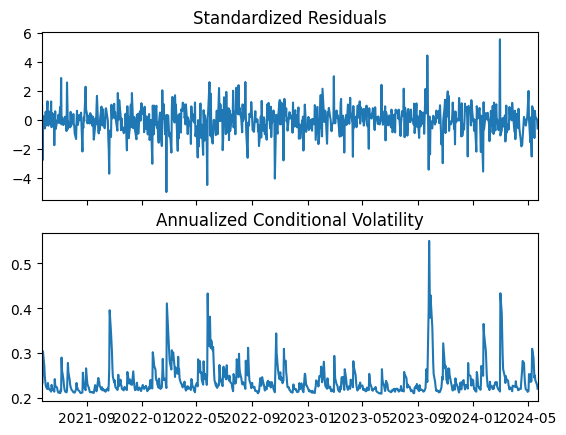

In [ ]:
fig = res.plot(annualize="D")